# **Convex Optimisation Using DAMSMEL and Gradient Descent**

This project is a test for DAMSMEL in terms of convex problem. We will use DAMSMEL, and Gradient Descent (GD) to optimise a convex function. As expected, both optimisers should performs well in this problem.

In [1]:
# Python Libraries:

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
from scipy.optimize import fsolve

import sys
import os
damsmel_dir = os.path.abspath('../damsmel')
sys.path.append(damsmel_dir)

from damsmel import DAMSMEL
from gradient_based_optimisers import gradient_descent

# Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, Markdown

## **1. Introduction**

Given a function $f: \mathbb{R}^2 \to \mathbb{R}$ defined by
$$
\forall x, y \in \mathbb{R} ,\;
f(x, y) := (x + y - \pi)^2 - 2xy
$$
which is a convex function. This function attains a single global minimum at $(\pi, \pi)$ which can be deduced from solving
$$
\nabla f(x, y) = \mathbf{0} \,.
$$

In this test, we will optimise $f$ using both DAMSMEL and GD as test for GD. The results of these two optimisers should have very near to $(\pi \pi)$. For a rigorous condition, let $\epsilon > 0$. We say that either DAMSMEL or GD is $\epsilon$-convergent if and only if
$$
\|\mathbf{u} - (\pi, \pi)\|_2 < \epsilon \,,
$$
where $\mathbf{u} \in \mathbb{R}^2$ is the solution by either DAMSMEL or GD.

## **2. Preparation**

While DAMSMEL can be executed straightforward, GD require us to compute the gradient of $f$ first, which is given as follows:
$$
\nabla f(u_1, u_2)
= \sum_{k = 1}^2 \frac{\partial}{\partial u_k} f(u_1, u_2)
= \begin{bmatrix}
2 u_1 - 2\pi \\ 2 u_2 - 2\pi
\end{bmatrix} \,.
$$

The Python code implementation for both $f$ and $\nabla f$ is given as follows.

In [2]:
# Python code for f:
f = lambda x: (x[0] + x[1] - np.pi)**2 - 2 *x[0] *x[1]
nabla_f = lambda x: np.array([2 *x[0] - 2 *np.pi, 2 *x[1] - 2 *np.pi])

To make the optimisation process for both optimisers fairly executed, we will apply the same starting point and the same number of iterations.

In [3]:
u0 = np.array([-10, -10])
steps = 1000

## **3. Optimisation**

### **3.1. DAMSMEL**

In [4]:
damsmel = DAMSMEL(f, 2)
damsmel_solution = damsmel.optimize(
    u0, 5, M= steps
)

>>> Runtime: 0.39150500297546387 seconds []


DAMSMEL Solution, $\mathbf{u} =$ (3.1415926475139972, 3.1415926414377773)

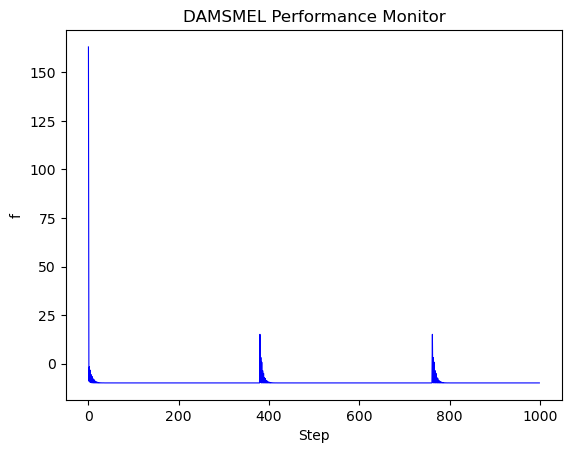

In [5]:
display(
    Markdown(
        r"DAMSMEL Solution, $\mathbf{u} =$"
        + f" {tuple(damsmel_solution)}"
    )
)

damsmel.monitor["loss"].plot(
    xlabel= "Step", ylabel= "f",
    title= "DAMSMEL Performance Monitor",
    color= "blue",
    linewidth= 0.8
);

### **3.2. Gradient Descent**

In [6]:
gd_monitor = gradient_descent(f, nabla_f, u0, M= steps)
gd_solution = list(gd_monitor[gd_monitor["loss"] == gd_monitor["loss"].min()]["solution"])[0]

>>> Total Time: 0.005568981170654297 seconds []


GD Solution, $\mathbf{v} =$ (3.1415926248300696, 3.1415926248300696)

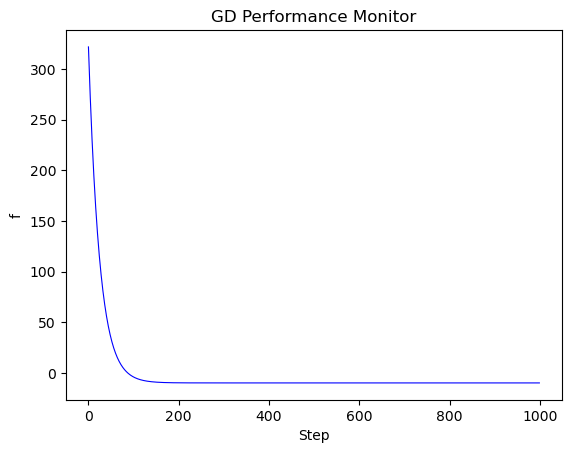

In [7]:
display(
    Markdown(
        r"GD Solution, $\mathbf{v} =$"
        + f" {tuple(gd_solution)}"
    )
)

gd_monitor["loss"].plot(
    xlabel= "Step", ylabel= "f",
    title= "GD Performance Monitor",
    color= "blue",
    linewidth= 0.8
);

## **4. Evaluation**

We will now evaluate the results of the two optimisers in minimising $f$. First, we will evaluate whether the solutions are $\epsilon$-convergent. Let $\epsilon := 10^{-6}$. We obtain as follows:

In [8]:
eval_DAMSMEL = np.linalg.norm(damsmel_solution - np.array([np.pi] *2))
eval_GD = np.linalg.norm(gd_solution - np.array([np.pi] *2))

def evaluation_result(eval, notat):
    if eval < 10**(-6):
        sign = r"$<$"
    else:
        sign = r"$\geq$"
    display(
        Markdown(
            r"$\|$" + notat + r"$ - (\pi, \pi)\|_2 =$" + " " + str(eval) + sign + r"$\epsilon$"
        )
    )

evaluation_result(eval_DAMSMEL, r"$\mathbf{u}$")
evaluation_result(eval_GD, r"$\mathbf{v}$")

$\|$$\mathbf{u}$$ - (\pi, \pi)\|_2 =$ 1.3586271907275646e-08$<$$\epsilon$

$\|$$\mathbf{v}$$ - (\pi, \pi)\|_2 =$ 4.067239101190567e-08$<$$\epsilon$

To further find which solution between DAMSMEL's and GD's is closer to $(\pi, \pi)$, we compute as follows:

In [9]:
def comparison():
    if eval_DAMSMEL < eval_GD:
        sign = r" $<$ "
    else:
        sign = r" $\geq$ "
    display(
        Markdown(
            r"$\|\mathbf{u} - (\pi, \pi)\|_2$" + sign + r"$\|\mathbf{v} - (\pi, \pi)\|_2$"
        )
    )

comparison()

$\|\mathbf{u} - (\pi, \pi)\|_2$ $<$ $\|\mathbf{v} - (\pi, \pi)\|_2$

The result shows that DAMSMEL solution is still closer to the actual analytic solution than GD, demonstrating a better accuracy than GD in convex setting with the same number of iterations.